<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221026_Data_Analysis_Project_on_Text_and_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/05/09/data-science-project-on-text-and-annotations/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [4]:
bd = data.copy()

In [5]:
for i in bd.columns:
  print(i, bd[i].unique())
  print('%%%%%%%'*10)

year [1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
day [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
gender ['F' 'M']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
births [  4046   4440   4454 ... 158939 173215 181235]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [6]:
for i in bd.columns:
  print(i, bd[i].unique())
  print('%%%%%%%'*10)

year [1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
day [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
gender ['F' 'M']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
births [  4046   4440   4454 ... 158939 173215 181235]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [7]:
births = bd.copy()

In [11]:
quartiles = np.percentile(bd['births'], [25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [12]:
quartiles_births = np.percentile(births["births"],[25, 50, 75])
quartiles_births

array([4358. , 4814. , 5289.5])

In [13]:
bd.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [14]:
mean, sigma = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
mean, sigma

(4814.0, 689.31)

In [15]:
mean, sigma = quartiles_births[1], 0.74 * (quartiles_births[2] - quartiles_births[0])

In [16]:
mean,sigma

(4814.0, 689.31)

In [19]:
births_ = bd.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births_

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [23]:
births_.day.value_counts()

1.0     480
2.0     480
28.0    480
27.0    480
26.0    480
25.0    480
24.0    480
23.0    480
22.0    480
21.0    480
20.0    480
19.0    480
18.0    480
17.0    480
16.0    480
15.0    480
14.0    480
13.0    480
12.0    480
11.0    480
10.0    480
9.0     480
8.0     480
7.0     480
6.0     480
5.0     480
4.0     480
3.0     480
29.0    450
30.0    440
31.0    280
Name: day, dtype: int64

In [22]:
births_births = births.query("(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)")
births_births.day.value_counts()

1.0     480
2.0     480
28.0    480
27.0    480
26.0    480
25.0    480
24.0    480
23.0    480
22.0    480
21.0    480
20.0    480
19.0    480
18.0    480
17.0    480
16.0    480
15.0    480
14.0    480
13.0    480
12.0    480
11.0    480
10.0    480
9.0     480
8.0     480
7.0     480
6.0     480
5.0     480
4.0     480
3.0     480
29.0    450
30.0    440
31.0    280
Name: day, dtype: int64

In [21]:
births_births["day"] = births_births["day"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
births_['day'] = births_['day'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
births_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14610 non-null  int64 
 1   month   14610 non-null  int64 
 2   day     14610 non-null  int64 
 3   gender  14610 non-null  object
 4   births  14610 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 684.8+ KB


In [26]:
bd = births_.copy()

In [27]:
bd.index = pd.to_datetime(10000 * bd.year + 100 * bd.month + bd.day, format='%Y%m%d')

In [28]:
bdDate = bd.pivot_table('births', [bd.index.month, bd.index.day])

In [29]:
bdDate.index = [pd.datetime(2012, month, day) for (month, day) in bdDate.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


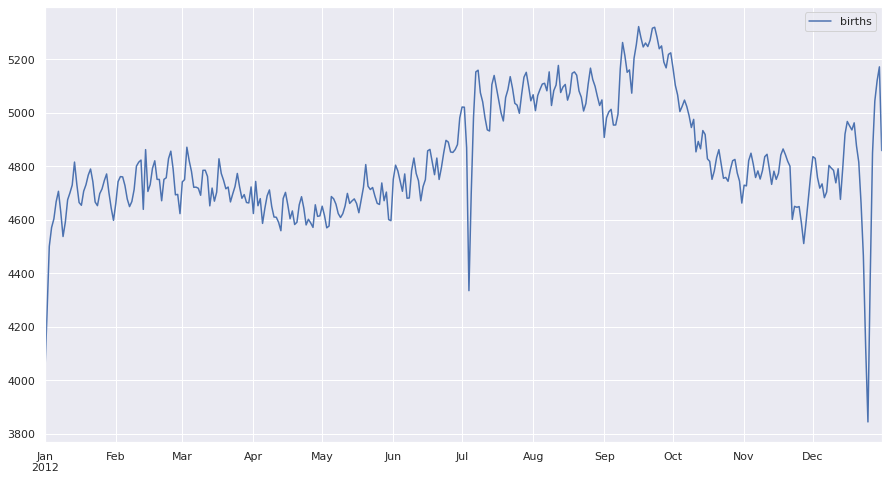

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
bdDate.plot(ax = ax)
plt.show()

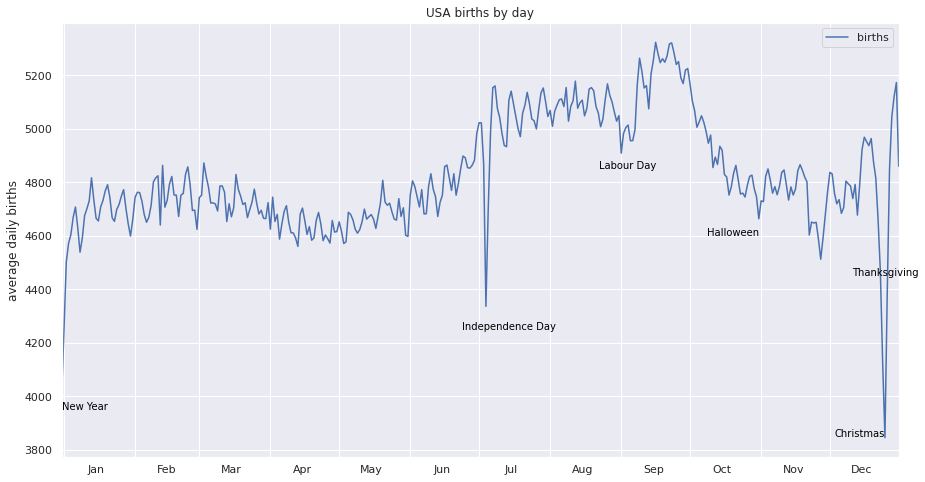

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
bdDate.plot(ax=ax)
style = dict(size=10, color='black')
ax.text("2012-1-1", 3950, "New Year", **style)
ax.text("2012-7-14", 4250, "Independence Day", ha="center", **style)
ax.text("2012-9-4", 4850, "Labour Day", ha="center", **style)
ax.text("2012-10-31", 4600, "Halloween", ha="right", **style)
ax.text("2012-12-25", 4450, "Thanksgiving", ha="center", **style)
ax.text("2012-12-25", 3850, "Christmas", ha="right", **style)
# Labeling the axes
ax.set(title= "USA births by day", ylabel="average daily births")
# Format the x axis with centerd month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%h"))
plt.show()

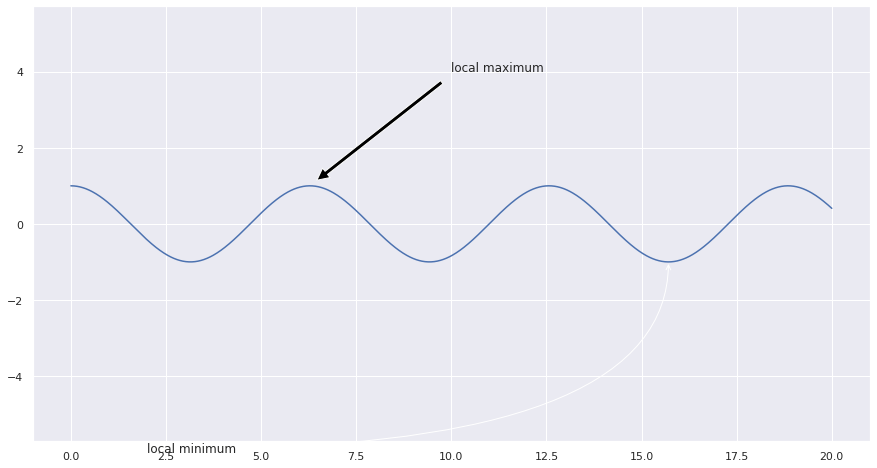

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

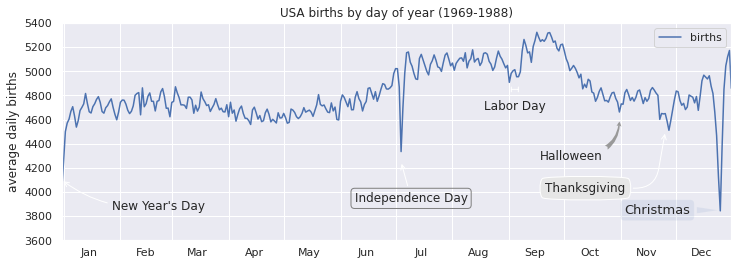

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
bdDate.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400)
plt.show()